## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import *

%matplotlib inline


mp = ixmp.Platform()


<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


## Clone baseline and create emission bound scenario

In [2]:
# this is to import scenario from data base and clone to local
base = message_ix.Scenario(mp, model='GENIE_sandbox', scenario="baselineYWP")
scen = base.clone(
    "GENIE_sandbox",
    "cb1000",
    "1000 carbon budget scenario without daccs",
    keep_solution=False, 
)
scen.check_out()

year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")


#### Add emission bound

In [3]:
# add emission bound
scen.add_par('bound_emission', ['World', 'TCE', 'all', 'cumulative'], value=4046, unit="tC")


## Run the model

In [4]:
scen.commit(comment="DACs scenario with emission bound")
scen.set_as_default()

In [5]:
scen.solve(solve_options={'scaind': '0'}) # solve_options={'barcrossalg': '2','scaind':'1'}
scen.var("OBJ")["lvl"]

2609393.0

## Key variables report
- CO2_emission
- CO2_removal
- CO2_price

In [6]:
# CO2 Emission
emiss = scen.var("EMISS")
emiss = emiss.loc[(emiss['type_tec'] == 'all') & (emiss['node'] == 'World') & (emiss['emission'] == 'TCE')]
emiss_plot = emiss[['year','lvl']].set_index(['year'])

# CO2 Removal
removal = scen.var("EMISS")
removal = removal.loc[(removal['type_tec'] == 'all') & (removal['node'] == 'World') & (removal['emission'] == 'CO2_storage')]
removal_plot = removal[['year','lvl']].set_index(['year'])

# CO2 Prices
CO2Price = scen.var("PRICE_EMISSION")[['year','lvl']].set_index(['year'])

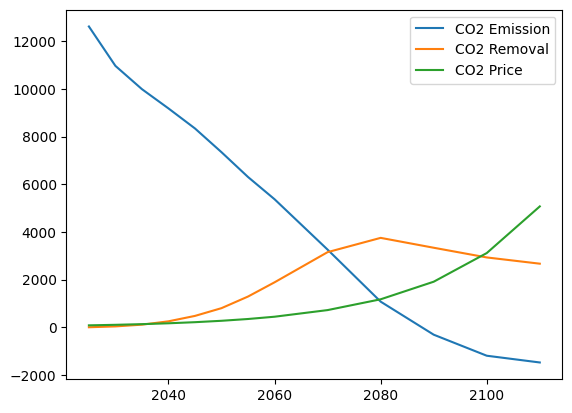

In [7]:
# Plottings
plt.plot(emiss_plot, label='CO2 Emission')
plt.plot(removal_plot, label='CO2 Removal')
plt.plot(CO2Price, label='CO2 Price')
plt.legend()
plt.show()

## Close connection

In [8]:
mp.close_db()